In [72]:
VAzipcodes=pd.read_csv('rate_files/2018rate.csv');
VAzipcodes=VAzipcodes.rename(columns={"zipcode": "zip"})

In [73]:
VAzipcodes

,zip,count,pop,rate
0,22185,0,0,0.0
1,22214,0,0,0.0
2,23250,0,0,0.0
3,23304,0,0,0.0
4,23709,0,0,0.0
...,...,...,...,...
887,24634,0,422,0.0
888,24635,0,1407,0.0
889,24646,0,765,0.0
890,24649,0,2761,0.0


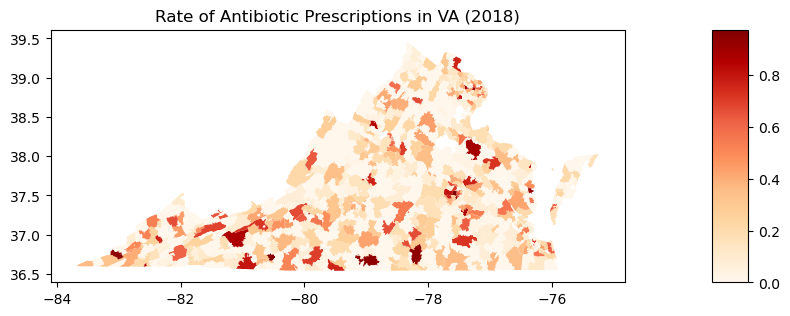

In [75]:
from geopandas import GeoDataFrame
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
# scheme = mc.Quantiles(fullData['rate'], k=10)
%config Completer.use_jedi = False

vazcdf=pd.read_csv('VAzipcodes.csv')
vazc=vazcdf.zip.astype(str).unique()
vagdf=gpd.read_file('va_zipcode_shape')
vagdf=vagdf.rename(columns={'ZCTA5CE10':'zip'})
VAzipcodes['zip']=VAzipcodes['zip'].astype(int)
vagdf['zip']=vagdf['zip'].astype(int)
vagdf=vagdf.merge(VAzipcodes,on='zip')

fig,ax=plt.subplots(figsize=(10,12))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
vagdf.plot(column='rate',ax=ax,cmap='OrRd',legend=True,cax=cax) #viridis #OrRd
ax.set_title("Rate of Antibiotic Prescriptions in VA (2018)")
plt.savefig('2018_rate.png')